In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [236]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
train_orignal = train.copy()
test_orignal = test.copy()

In [237]:
print(train[:15]) #printing staring 15 values
print(train['Loan_Status'].value_counts(normalize = 'true'))

     Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   
5   LP001011   Male     Yes          2      Graduate           Yes   
6   LP001013   Male     Yes          0  Not Graduate            No   
7   LP001014   Male     Yes         3+      Graduate            No   
8   LP001018   Male     Yes          2      Graduate            No   
9   LP001020   Male     Yes          1      Graduate            No   
10  LP001024   Male     Yes          2      Graduate            No   
11  LP001027   Male     Yes          2      Graduate           NaN   
12  LP001028   Male     Yes          2      Graduate            No   
13  LP001029   Male 

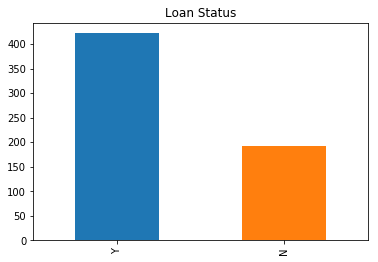

In [238]:
train['Loan_Status'].value_counts().plot.bar(title = 'Loan Status')

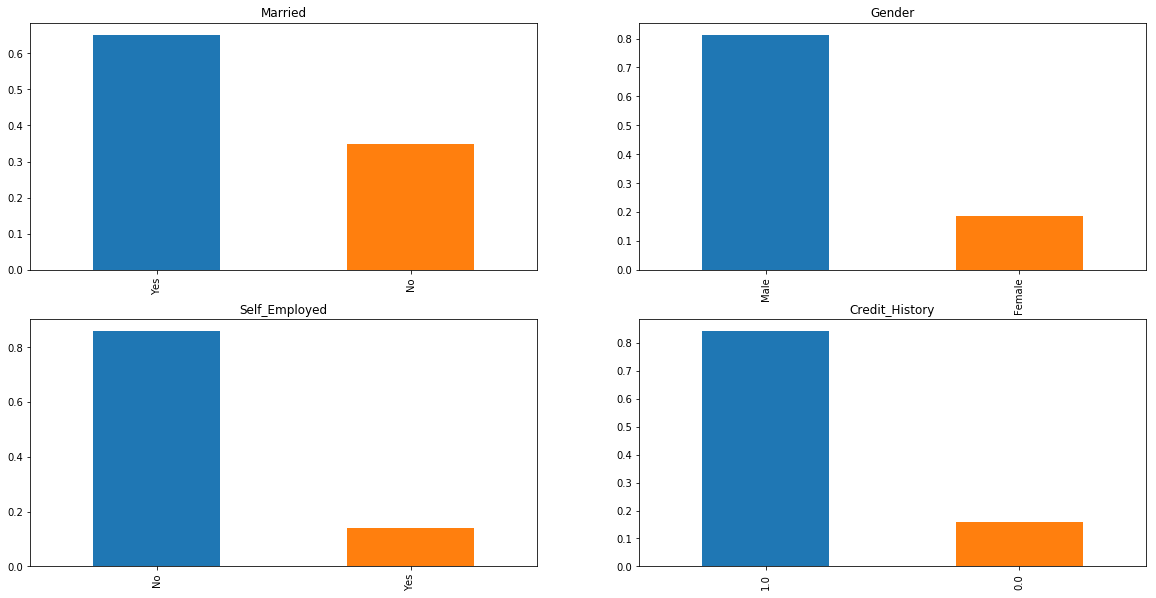

In [239]:
#plt.figure(1)
plt.subplot(222) #Used For Positioning the Graph
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(221) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

C:\Users\shiva\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


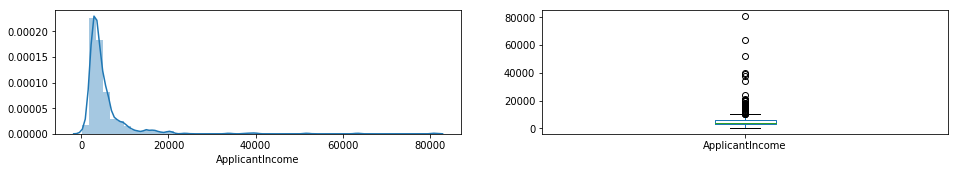

Text(0.5, 0.98, '')

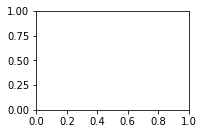

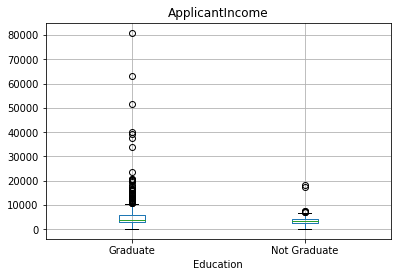

In [240]:
#plt.figure(1) 
plt.subplot(221) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(222) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
plt.subplot(223)
train.boxplot(column= 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

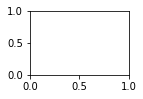

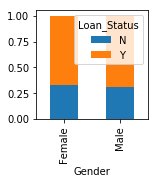

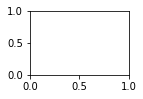

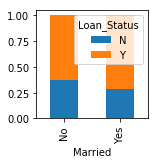

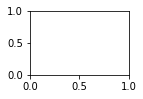

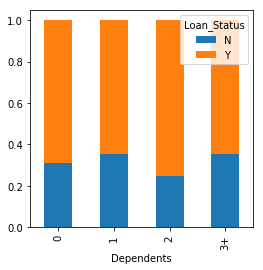

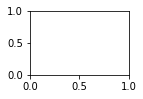

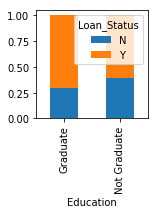

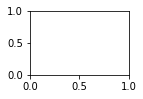

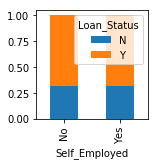

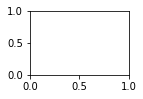

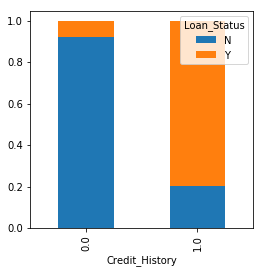

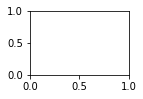

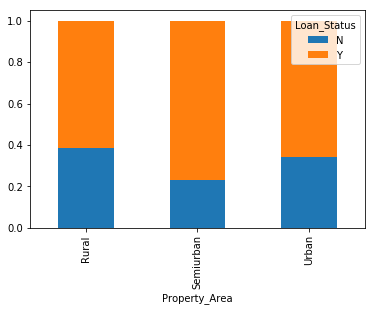

In [241]:
#Bivariate Analysis
plt.subplot(331)
Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True,figsize = (2,2))
plt.show()

plt.subplot(332)
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2)) 
plt.show()

plt.subplot(333)
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4)) 
plt.show()

plt.subplot(334)
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2)) 
plt.show()

plt.subplot(335)
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2)) 
plt.show()

plt.subplot(336)
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])  
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

plt.subplot(337)
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

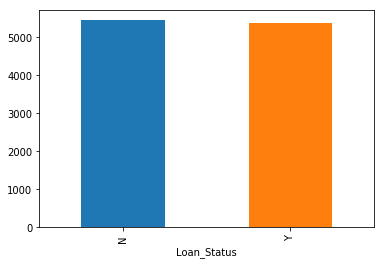

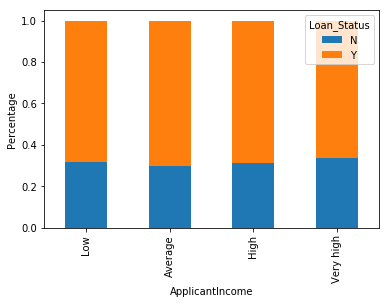

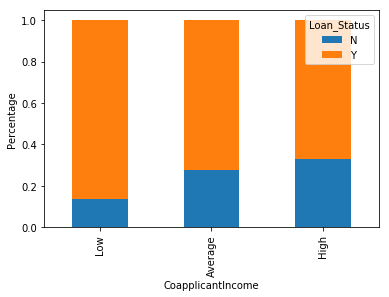

In [242]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind="bar") # Plot Loan status my mean income
#As We cannot see changes Via mean income We divide incomes in different group and then analyse it using bin
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')



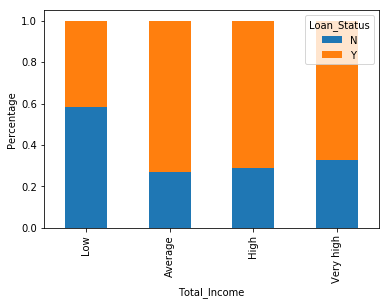

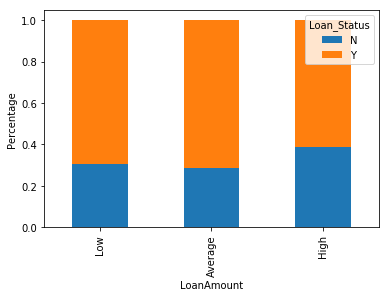

In [243]:
#It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

#train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
#train['Dependents'].replace('3+', 3,inplace=True)
#test['Dependents'].replace('3+', 3,inplace=True)
#train['Loan_Status'].replace('N', 0,inplace=True) 
#train['Loan_Status'].replace('Y', 1,inplace=True)
#matrix = train.corr()
#f, ax = plt.subplots(figsize=(9, 6)) 
#sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


In [244]:
train.isnull().sum() #this is missing Values(Which should be filled first) sum
#So We are filling this by taking mod of all the values for corresponding feature
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()
#Filling Values for test
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

train = 

In [245]:
#Model
train=train.drop('Loan_ID',axis=1)  #We are Not including Load_Id in training because it will be independent of of the result 
test=test.drop('Loan_ID',axis=1)
X = train.drop('Loan_Status',1) 
y = train.Loan_Status
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.2)

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

#X_test = test.drop('Loan_Status',1)
#pred_test = model.predict(X_test)


C:\Users\shiva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8617886178861789